<a href="https://colab.research.google.com/github/NaithaniAR/NYC-Taxi-Trip-Time-Prediction---Capstone-Project.ipynb/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing  libraries

 Importing important libraries for analysis and visualisation 

In [113]:
pip install matplotlib==3.1.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.formula.api as sm
%matplotlib inline
import calendar


Libraries for machine learning 

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [116]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from xgboost import XGBRegressor


In [117]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/df.csv',parse_dates=['pickup_datetime','dropoff_datetime'])

#To suppres scientific notation.
pd.options.display.float_format = '{:.2f}'.format 

pd.set_option('display.max_columns', None)

In [330]:
pd.option_context('display.precision', 10)

In [329]:
pd.set_option('display.max_columns', None)

# **Data Exploration**
We will explore the data and modify dataset as per the our requirment for the further analysis of the problem.

In [118]:
# Checking top 5 records in dataframe

df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance
0,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455,1.22
1,1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663,1.33
2,2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124,2.10
3,3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429,0.30
4,4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435,0.20


In [119]:
# Checking bottom 5 records in dataframe

df.tail()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance
1354578,1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98,40.75,-73.99,40.74,N,778,0.89
1354579,1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00,40.75,-73.97,40.80,N,655,2.33
1354580,1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.96,40.77,-74.00,40.71,N,764,3.35
1354581,1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98,40.75,-73.97,40.76,N,373,0.54
1354582,1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.98,40.78,-73.97,40.79,N,198,0.50


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354583 entries, 0 to 1354582
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Unnamed: 0          1354583 non-null  int64         
 1   id                  1354583 non-null  object        
 2   vendor_id           1354583 non-null  int64         
 3   pickup_datetime     1354583 non-null  datetime64[ns]
 4   dropoff_datetime    1354583 non-null  datetime64[ns]
 5   passenger_count     1354583 non-null  int64         
 6   pickup_longitude    1354583 non-null  float64       
 7   pickup_latitude     1354583 non-null  float64       
 8   dropoff_longitude   1354583 non-null  float64       
 9   dropoff_latitude    1354583 non-null  float64       
 10  store_and_fwd_flag  1354583 non-null  object        
 11  trip_duration       1354583 non-null  int64         
 12  Distance            1354583 non-null  float64       
dtypes: datetime6

In [121]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [122]:
print("The shape of our dataset is :",(df.shape))

The shape of our dataset is : (1354583, 12)


In [123]:
#Check count of unique id's in the dataset

print("There are %d unique id's in our dataset, which is equal to the number of records"%(df.id.nunique()))

There are 1354583 unique id's in our dataset, which is equal to the number of records


In [124]:
#Check for NaN values

df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
Distance              0
dtype: int64

# Exploratory Data Analysis 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


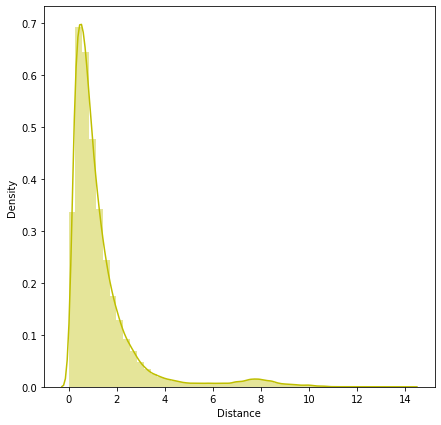

In [125]:
# Dependent variable 'Price'

plt.figure(figsize=(7,7))
sns.distplot(df['Distance'],color="y")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


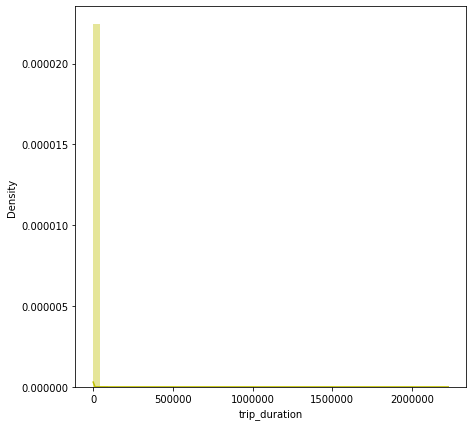

In [126]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(df['trip_duration'],color="y")

Our data is positively skewed, we will do log transformation 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


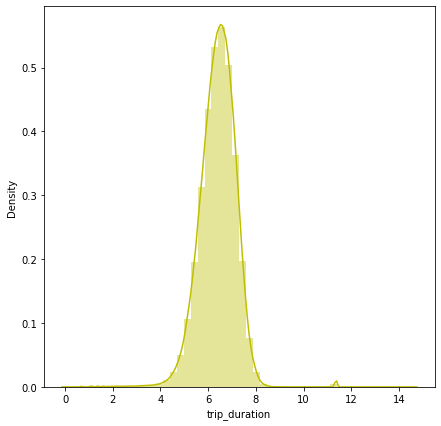

In [127]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(np.log(df['trip_duration']),color="y")

In [128]:
numeric_features = df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'Distance'],
      dtype='object')

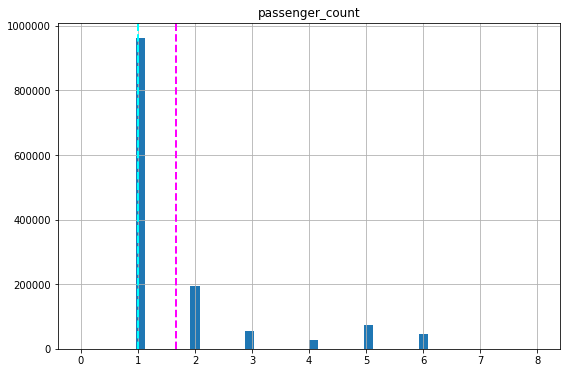

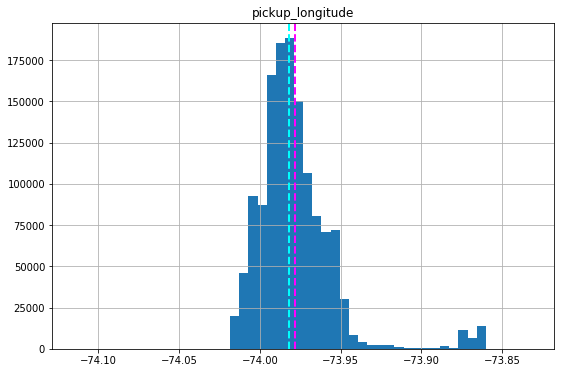

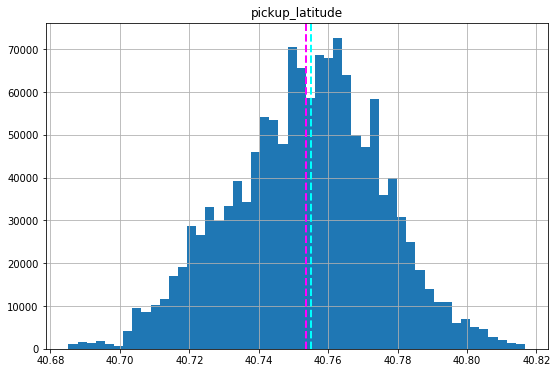

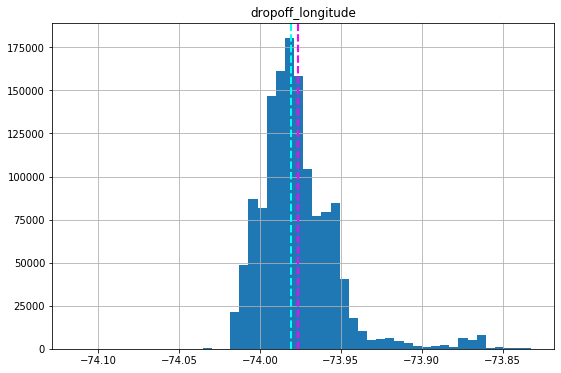

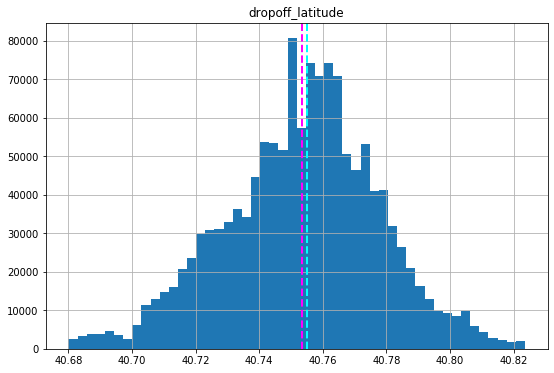

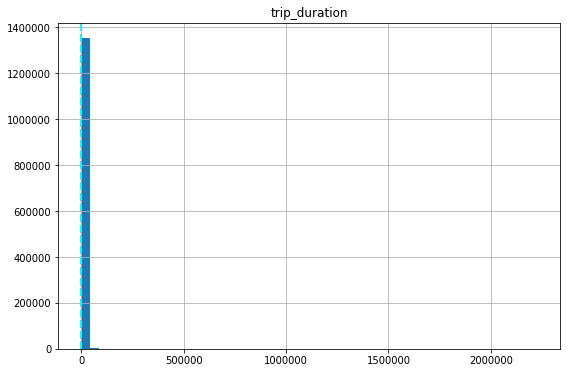

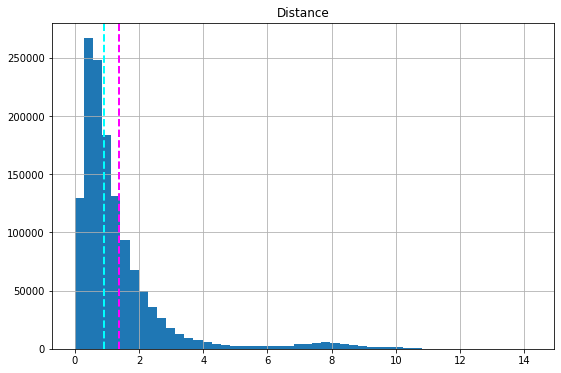

In [129]:
#@title Default title text
# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

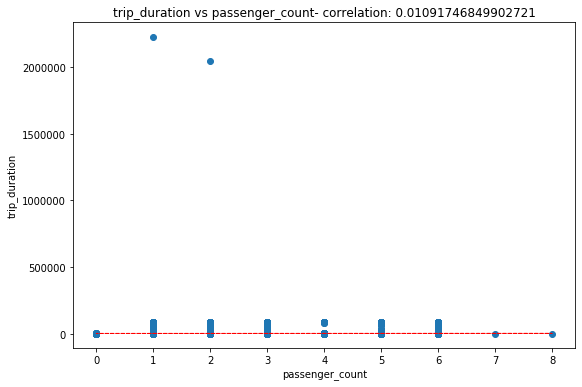

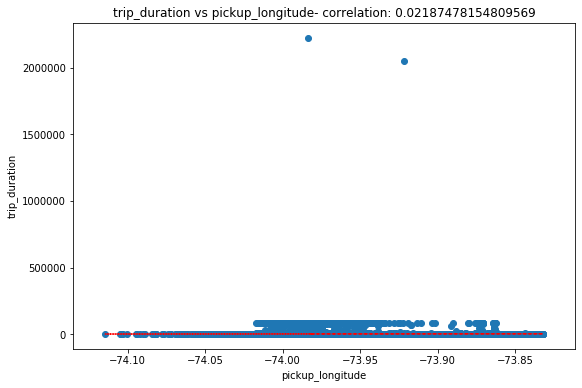

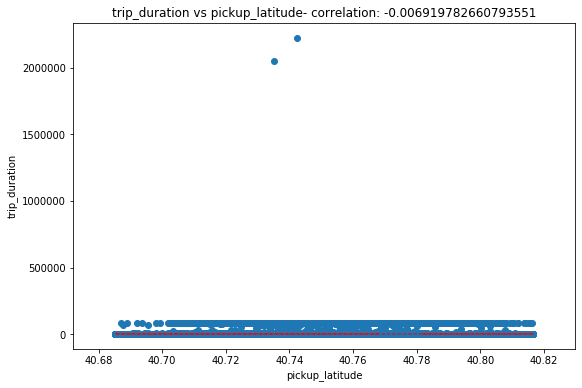

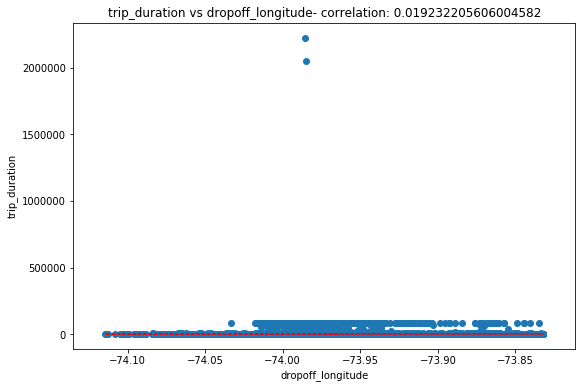

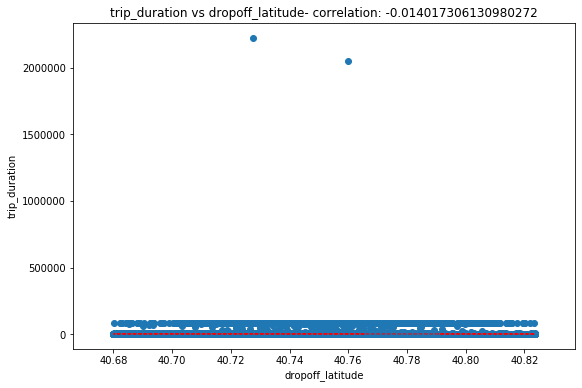

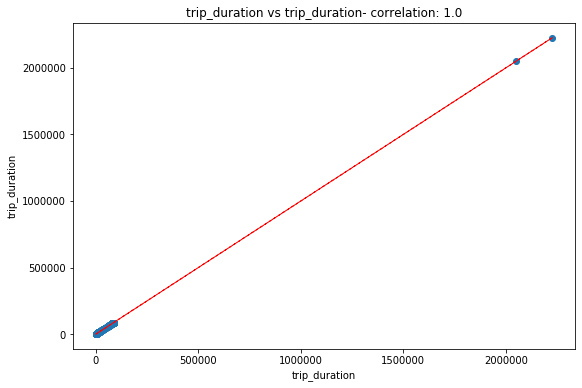

In [130]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('trip_duration')
    ax.set_title('trip_duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['trip_duration'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

In [131]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'Distance'],
      dtype='object')

In [132]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [133]:
 calc_vif(df[[i for i in df.describe().columns if i not in ['haversine_distance','id','vendor_id','dropoff_month']]])

,variables,VIF
0,passenger_count,2.60
1,pickup_longitude,8310642.60
2,pickup_latitude,4970747.03
3,dropoff_longitude,8954071.97
4,dropoff_latitude,4195261.46
5,trip_duration,1.05
6,Distance,1.87


# Feature Engineering

### **Distance:**

[**Haversine Distance :**](https://pypi.org/project/haversine/)
The majority of geospatial analysts agree that this is the appropriate distance to use for Earth distances and is argued to be more accurate over longer distances compared to Euclidean distance.

Performance is faster in computing compared to other great circle distance formulas such as [Vincenty Formula](https://pypi.org/project/vincenty/)


Manhattan Distance

**The Manhattan Distance :** *is a measure of the distance between two points that take into account the perpendicular layout of the map. It is called Manhattan distance because Manhattan is known for its grid or block layout where streets intersect at right angles*. [For more info](https://towardsdatascience.com/spatial-distance-and-machine-learning-2cab72fc6284)

In [134]:
#we will use Haversine distance to calculate great circle distance between two points and manhattan distance to calculate block distance 

def haversine_distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

  
#manhattan distance to calculate block distance 

def manhattan_distance(lat1, lng1, lat2, lng2):
    # km 
    a = haversine_distance(lat1, lng1, lat1, lng2)
    b = haversine_distance(lat1, lng1, lat2, lng1)
    return a + b
  

In [135]:
#Adding column "haversine_distance" in our df 

df["haversine_distance"] = haversine_distance(df["pickup_latitude"], df["pickup_longitude"],df["dropoff_latitude"], df["dropoff_longitude"])


#Adding column "manhattan_distance" in our df 

df["manhattan_distance"] = manhattan_distance(df["pickup_latitude"], df["pickup_longitude"], df["dropoff_latitude"], df["dropoff_longitude"])

In [136]:
# Running a check with Data obtained from google. 

df.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance,haversine_distance,manhattan_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455,1.22,0.93,1.08


We observe the Minimum **driving distance** for our first observation according to google is [1.5 miles](https://www.google.com/maps/dir/'40.77,-73.98'/'40.77,-73.96'/@40.7689841,-73.9738618,15z/data=!4m13!4m12!1m5!1m1!1s0x0:0xb0aac0a0d6383216!2m2!1d-73.98!2d40.77!1m5!1m1!1s0x0:0x778ea6368195c8d2!2m2!1d-73.96!2d40.77), when compared to distance that we [calculated earlier](https://github.com/NaithaniAR/NYC-Taxi-Trip-Time-Prediction---Capstone-Project.ipynb/blob/main/NYC_Taxi_Trip_Driving_Distance.ipynb) with haversine distance and manhatten distance, we observe that osmnx is the most accurate.  

### **Pickup Datetime &  Dropoff Datetime**


*   Date and Time when the meter was disengaged and engaged
*   Extracing Date Time Month Day and Year for further analysis 


In [137]:
#Date

df['pickup_date']=df['pickup_datetime'].dt.date
df['dropoff_date']=df['dropoff_datetime'].dt.date


#Day

df['pickup_weekday']=df['pickup_datetime'].dt.day_name().astype('category')
df['dropoff_weekday']=df['dropoff_datetime'].dt.day_name().astype('category')


#Month

df['pickup_month']=df['pickup_datetime'].dt.month.astype(float)
df['dropoff_month']=df['dropoff_datetime'].dt.month.astype(float)


# Time

df['Pick_Up_time'] = df['pickup_datetime'].dt.time
df['Drop_off_time'] = df['dropoff_datetime'].dt.time


#Year

df['pickup_Year']=df['pickup_datetime'].dt.year.astype(float)
df['dropoff_Year']=df['dropoff_datetime'].dt.year.astype(float)


#Hour

df['pickup_datetime_hour'] = df.pickup_datetime.dt.hour.astype(float)
df['dropoff_datetime_hour'] =df.dropoff_datetime.dt.hour.astype(float)


# Univariate Analysis

### **ID**
*A unique identifier for each trip*

In [138]:

df['id'].describe()

count       1354583
unique      1354583
top       id2875421
freq              1
Name: id, dtype: object

There are no duplicate values in 'id', with  1354583 unique values 

### Distance 

In [139]:
#Running a describe column to compare the distance columm 

df[['Distance','haversine_distance','manhattan_distance' ]].describe()

,Distance,haversine_distance,manhattan_distance
count,1354583.00,1354583.00,1354583.00
mean,1.37,1.68,2.16
std,1.56,1.42,1.82
min,0.00,0.00,0.00
25%,0.51,0.74,0.94
50%,0.90,1.22,1.57
75%,1.58,2.11,2.72
max,14.22,11.47,15.52


In [140]:
# Removing the potential distance outlier 

# Removing the bottom 1 perentile values as distance travelled cannot be equal to zero. 

df = df[ df['Distance'] > df['Distance'].quantile(0.01)]


df = df[(df['manhattan_distance'] < df['manhattan_distance'].quantile(0.99)) & (df['manhattan_distance'] > df['manhattan_distance'].quantile(0.01))]
 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


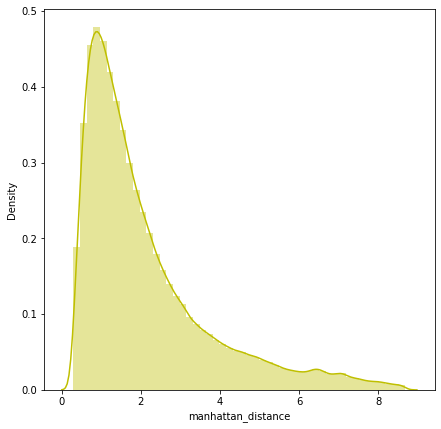

In [141]:
#Checking for Skweness 

plt.figure(figsize=(7,7))
sns.distplot(df['manhattan_distance'],color="y")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


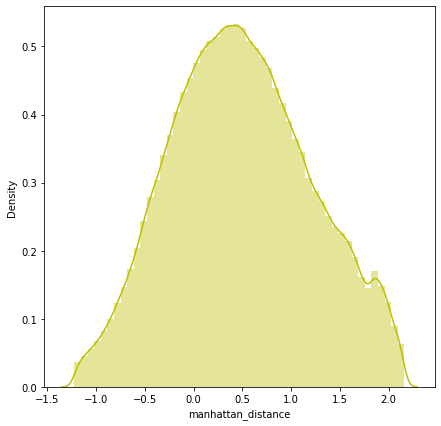

In [142]:
#Log Transforamtion 

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['manhattan_distance']),color="y")

Here we will impliment log transform. 

### Vendor id

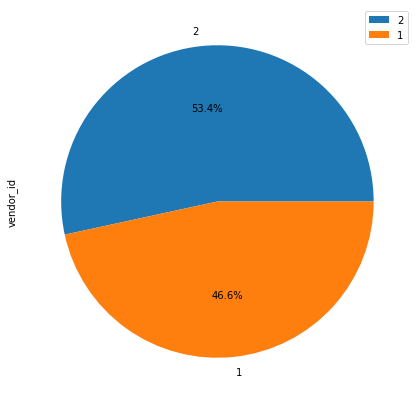

In [143]:
# Pie chart for vendor ID distribution 

df['vendor_id'].value_counts().plot.pie(figsize = (7,9), autopct='%1.1f%%')
plt.legend()


We can observe that there are approximately similar percentage on both side 

### **Passenger Count**
The number of passengers in the vehicle (driver entered value)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


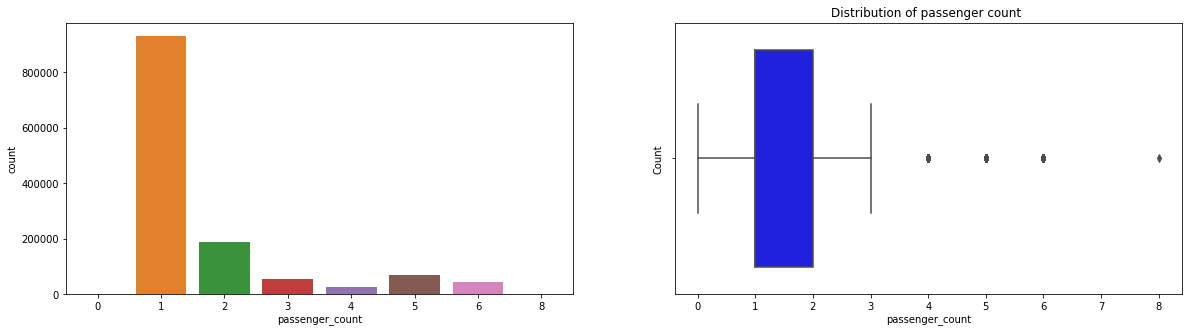

In [144]:
#Plotting Sub Plot 

fig, axes = plt.subplots(1, 2,figsize=(20,5))

#Plotting bar graph 

sns.countplot(df['passenger_count'],ax=axes[0])
plt.title('Distribution of passenger count ')
plt.xlabel('Passenger')
plt.ylabel('Count')
#Plotting Box Plot

sns.boxplot(df['passenger_count'],color='blue',ax=axes[1])

According to [ Driver Rule 54-15(g)](https://www1.nyc.gov/assets/tlc/downloads/pdf/rule_book_current_chapter_54.pdf) of 'NYC Taxi and Limousine Commission' ,  maximum permissible number of passengers in a taxi is 6. Hence we will drop values which are greater than 6. 

There are some values that are represented by 0, we will drop these values to. because this is clearly a mistake and no further data is available for drawing any conclusions. 

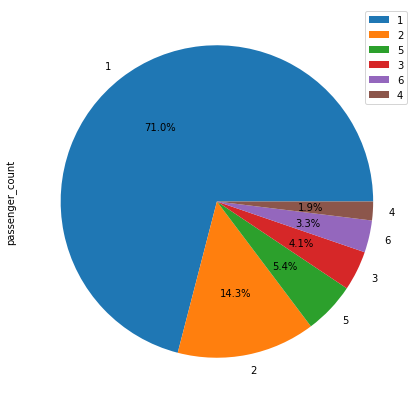

In [145]:
#Dropping Passenger Count 

df= df[(df['passenger_count']>0) & (df['passenger_count']<=6)]

#Plotting pie chart 

df['passenger_count'].value_counts().plot.pie(figsize = (7,9), autopct='%1.1f%%')
plt.legend()

### Trip Duration


Text(0.5, 1.0, 'Duration Distribution')

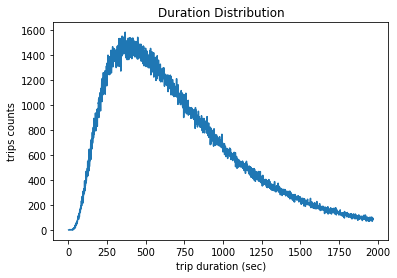

In [146]:
# trip duration overall distribution 
# taking the 97% Quantile values to remove outliers 

tripduration = df[df.trip_duration < df.trip_duration.quantile(.97)]


#Plotting Trip duration VS Trip_duration.counts

tripduration.groupby('trip_duration').count()['id'].plot()
plt.xlabel('trip duration (sec)')
plt.ylabel('trips counts')
plt.title('Duration Distribution')

In [147]:
df['trip_duration'].sort_values().tail()

700182      86379
55711       86387
68649       86390
632292    2049578
858347    2227612
Name: trip_duration, dtype: int64


*   Most trips finished within 6-17 minute (400-1000 sec)
*  Some trips take too long/too fast are obvious wrong, maybe because of tech/maunal operation issues, should filter them in following process





In [148]:
# Trip duration should less then 12 hours and greater than 30 seconds normally
      
df = df[(df['trip_duration']  < 12*3600) & (df['trip_duration'] > 30)]


# Remove potential  trip duration outlier

df = df[(df['trip_duration'] < df['trip_duration'].quantile(0.99)) & (df['trip_duration'] > df['trip_duration'].quantile(0.01))]

### Speed

In [149]:
#Calculate Speed 
# Distance obtained is in Miles/hr

df['Avg_speed'] = 3600 * df['Distance'] / df['trip_duration']

The speed limit set in [USA](https://en.wikipedia.org/wiki/Speed_limits_in_the_United_States) for fastest moterable road is set at 85 miles per hour, and avg walking speed is considered to be 3mph. so limiting our data to this and adding a 50 % margin for overspeeding and traffic jams.

In [150]:
# Setting speed in a logical range 

df = df[(df['Avg_speed']  < 130) & (df['Avg_speed'] > 1.0)]


# Removing outliers

df = df[(df['Avg_speed'] < df['Avg_speed'].quantile(0.999)) & (df['Avg_speed'] > df['Avg_speed'].quantile(0.001))]

### **store_and_fwd_flag**
 This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

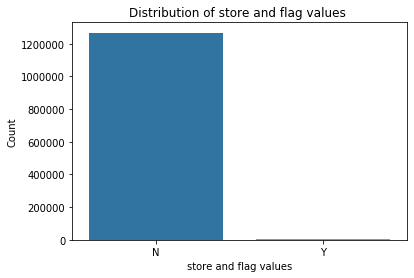

In [151]:
#Plotting bar graph 


sns.countplot(df['store_and_fwd_flag'])
plt.title('Distribution of store and flag values ')
plt.xlabel('store and flag values')
plt.ylabel('Count')


# Bivariate analysis

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273780 entries, 0 to 1354582
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1273780 non-null  object        
 1   vendor_id              1273780 non-null  int64         
 2   pickup_datetime        1273780 non-null  datetime64[ns]
 3   dropoff_datetime       1273780 non-null  datetime64[ns]
 4   passenger_count        1273780 non-null  int64         
 5   pickup_longitude       1273780 non-null  float64       
 6   pickup_latitude        1273780 non-null  float64       
 7   dropoff_longitude      1273780 non-null  float64       
 8   dropoff_latitude       1273780 non-null  float64       
 9   store_and_fwd_flag     1273780 non-null  object        
 10  trip_duration          1273780 non-null  int64         
 11  Distance               1273780 non-null  float64       
 12  haversine_distance     12737

We have added new colums, we can use these colums to analyse our data further and perform bivariate analysis 

### Pickup date & Dropoff date

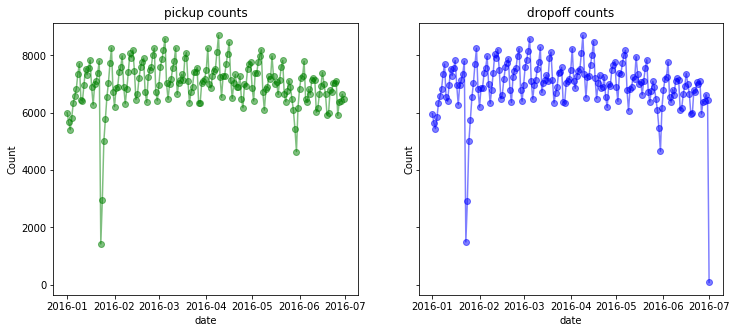

In [153]:
#Plotting graph of Pickup and Dropoff counts wrt to dates. 

fig, ax = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(12, 5)

ax[0].plot(df.groupby('pickup_date').count()['id'], 'go-', alpha=0.5)
ax[1].plot(df.groupby('dropoff_date').count()['id'], 'bo-', alpha=0.5)

ax[0].set(xlabel='date', ylabel='Count',title="pickup counts")
ax[1].set(xlabel='date', ylabel='Count',title="dropoff counts")

plt.show()

In [154]:
#Finding Dates with least number of pickups 

df.groupby('pickup_date').count()['id'].sort_values()

pickup_date
2016-01-23    1425
2016-01-24    2949
2016-05-30    4647
2016-01-25    5005
2016-01-03    5407
              ... 
2016-03-12    8259
2016-01-30    8261
2016-04-16    8460
2016-03-05    8583
2016-04-09    8700
Name: id, Length: 182, dtype: int64

In [155]:
#Finding Dates with least number of dropoffs

df.groupby('dropoff_date').count()['id'].sort_values()

dropoff_date
2016-07-01      81
2016-01-23    1493
2016-01-24    2921
2016-05-30    4659
2016-01-25    5002
              ... 
2016-01-30    8249
2016-03-12    8278
2016-04-16    8485
2016-03-05    8585
2016-04-09    8695
Name: id, Length: 183, dtype: int64

We observe that daily Drop Off vary between 6000 and 1000, values on 26-07-01,2016-01-23,2016-01-24 are considerably low, hence we will drop these observations.

In [156]:
#Dropping values from Date with abnormal values 
#Remove the 2016-01-23 data since its too less comapre others days, 
    # maybe quality is not good 


df= df[(df.pickup_date != '2016-01-23') ]
df= df[(df.dropoff_date != '2016-01-24') ]
df= df[(df.dropoff_date != '26-07-01') ]

### Passenger Count 

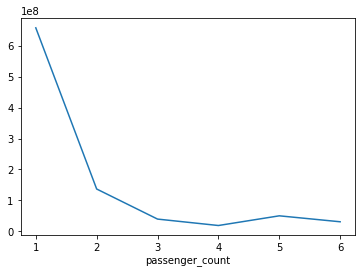

In [157]:
#Graph B/W 

df.groupby(['passenger_count']).sum()['trip_duration'].plot()

Trip duration is not related to passenger count, hence we can convert it to one hot encoding. 

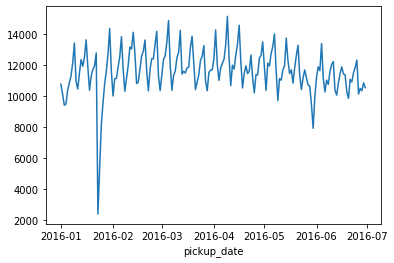

In [158]:
df.groupby(['pickup_date']).sum()['passenger_count'].plot()


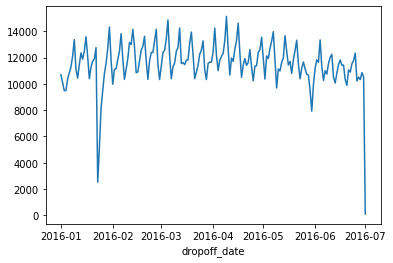

In [159]:
df.groupby(['dropoff_date']).sum()['passenger_count'].plot()

In [160]:
df.groupby(['dropoff_date']).sum()['passenger_count'].sort_values()

dropoff_date
2016-07-01      111
2016-01-23     2530
2016-01-24     5145
2016-05-30     7927
2016-01-25     8112
              ...  
2016-03-12    14245
2016-01-30    14318
2016-04-16    14608
2016-03-05    14858
2016-04-09    15129
Name: passenger_count, Length: 183, dtype: int64

In [161]:
df.groupby(['pickup_date']).sum()['passenger_count'].sort_values()

pickup_date
2016-01-23     2396
2016-01-24     5183
2016-05-30     7925
2016-01-25     8111
2016-01-03     9418
              ...  
2016-04-02    14269
2016-01-30    14368
2016-04-16    14571
2016-03-05    14885
2016-04-09    15146
Name: passenger_count, Length: 182, dtype: int64



*   Passenger count is considerably less on '2016-07-01' , '2016-01-23'  




### Trip Duration VS Hour

A [pivot table](https://pbpython.com/pandas-pivot-table-explained.html) is a table of grouped values that aggregates the individual items of a more extensive table

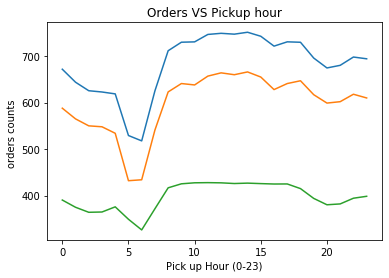

In [162]:
#tripduration = df_train_[df_train_.trip_duration < df_train_.trip_duration.quantile(.97)]  {As Calculated in section  }


pd.pivot_table(tripduration, index='pickup_datetime_hour' ,aggfunc=np.mean)['trip_duration'].plot(label='mean')
pd.pivot_table(tripduration, index='pickup_datetime_hour' ,aggfunc=np.median)['trip_duration'].plot(label='median')
pd.pivot_table(tripduration, index='pickup_datetime_hour' ,aggfunc=np.std)['trip_duration'].plot(label='std')

#plt.legend(loc=0)
plt.xlabel('Pick up Hour (0-23)')
plt.ylabel('orders counts ')
plt.title('Orders VS Pickup hour')
plt.show()

### store_and_fwd_flag VS  Trip duration 

Text(0, 0.5, 'Trip Duration')

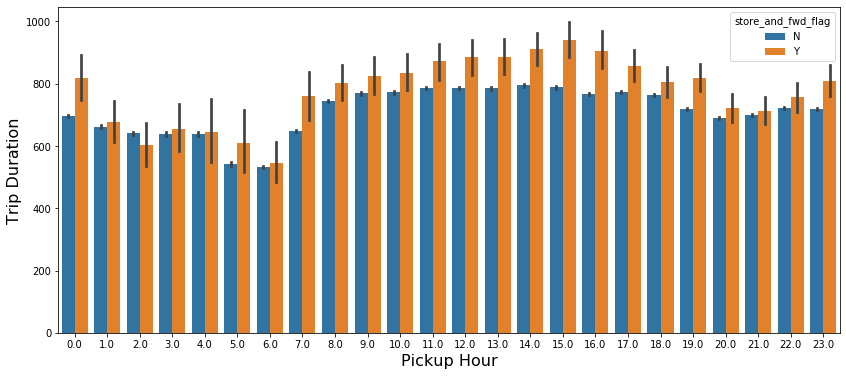

In [163]:
# Plottong  store_and_fwd_flag VS trip_duration


plt.figure(figsize=(14,6))
sns.barplot(x='pickup_datetime_hour',y='trip_duration',data=df,hue='store_and_fwd_flag')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration',fontsize=16)

### Trip Duration Vs. Pickup/Dropoff Hour for diffrent months. 

Text(0, 0.5, 'Trip Duration)')

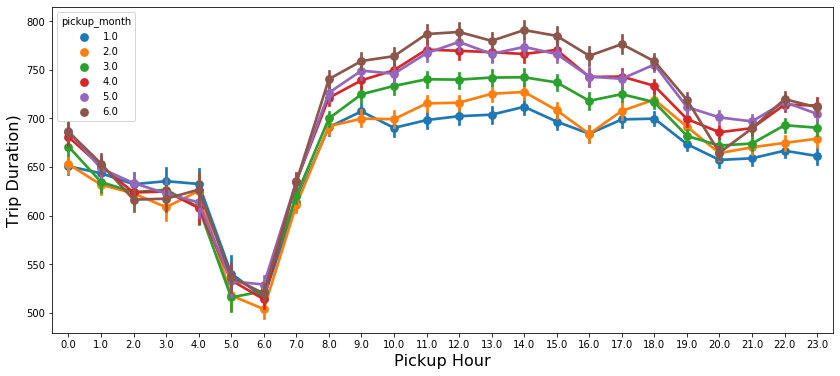

In [164]:
#Plot showing variation in trip duraion for diffrent pickups for diffrent months 

plt.figure(figsize=(14,6))
sns.pointplot(x='pickup_datetime_hour',y='trip_duration',data=tripduration,hue='pickup_month')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration)',fontsize=16)

Text(0, 0.5, 'Trip Duration)')

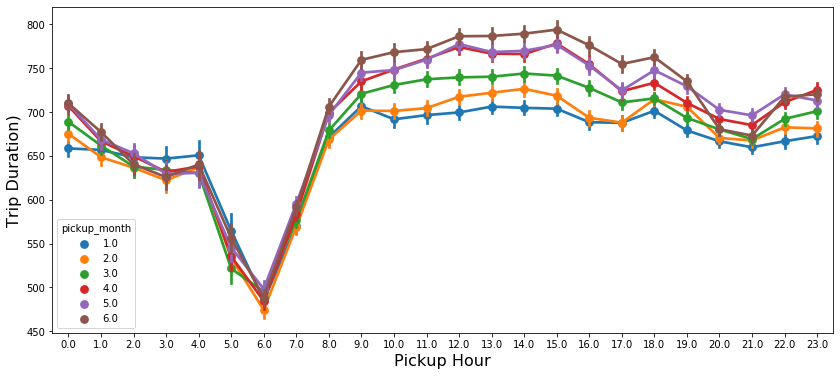

In [165]:
#Plot showing variation in trip duraion for diffrent dropoffs for diffrent months 

plt.figure(figsize=(14,6))
sns.pointplot(x='dropoff_datetime_hour',y='trip_duration',data=tripduration,hue='pickup_month')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration)',fontsize=16)

Months only affect duration a little bit ; while pickup hours seems may be infulence that more

### Trip Duration vs Pickup/Dropoff hour for diffrent days of the week 




Text(0, 0.5, 'Trip Duration)')

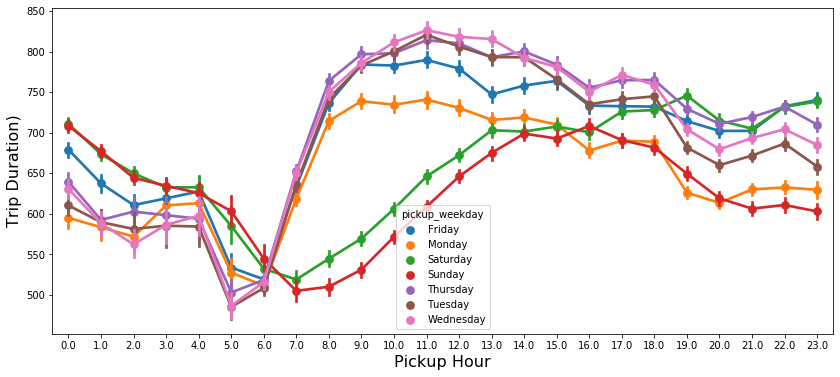

In [166]:

# Plotting a line graph to represent the change in time duration of trip for diffrent days of the week 

plt.figure(figsize=(14,6))
sns.pointplot(x='pickup_datetime_hour',y='trip_duration',data=tripduration,hue='pickup_weekday')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration)',fontsize=16)




*   During the moring rush hours from Monday to Friday ie. 7 AM to 10 AM, maybe owing to traffic jam.


* Duration are high duing wokday (Mon.-Fri.)






# Feature Engineering:

In [167]:
df.pickup_weekday.value_counts()

Friday       195098
Saturday     194996
Thursday     190419
Wednesday    183764
Tuesday      177966
Sunday       168485
Monday       163052
Name: pickup_weekday, dtype: int64

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273780 entries, 0 to 1354582
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1273780 non-null  object        
 1   vendor_id              1273780 non-null  int64         
 2   pickup_datetime        1273780 non-null  datetime64[ns]
 3   dropoff_datetime       1273780 non-null  datetime64[ns]
 4   passenger_count        1273780 non-null  int64         
 5   pickup_longitude       1273780 non-null  float64       
 6   pickup_latitude        1273780 non-null  float64       
 7   dropoff_longitude      1273780 non-null  float64       
 8   dropoff_latitude       1273780 non-null  float64       
 9   store_and_fwd_flag     1273780 non-null  object        
 10  trip_duration          1273780 non-null  int64         
 11  Distance               1273780 non-null  float64       
 12  haversine_distance     12737

In [169]:
#Dividing 24 hours into four parts
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [170]:
#Now let us apply this function and create new columns in the dataset.
df['pickup_timeofday'] = df['pickup_datetime_hour'].apply(time_of_day)
df['dropoff_timeofday']=df['dropoff_datetime_hour'].apply(time_of_day)

In [171]:
df.pickup_timeofday

0             Evening
1          Late night
2             Morning
3             Evening
4           Afternoon
              ...    
1354578     Afternoon
1354579       Morning
1354580       Morning
1354581     Afternoon
1354582     Afternoon
Name: pickup_timeofday, Length: 1273780, dtype: object

# Check for multicollinearity

Correlation :

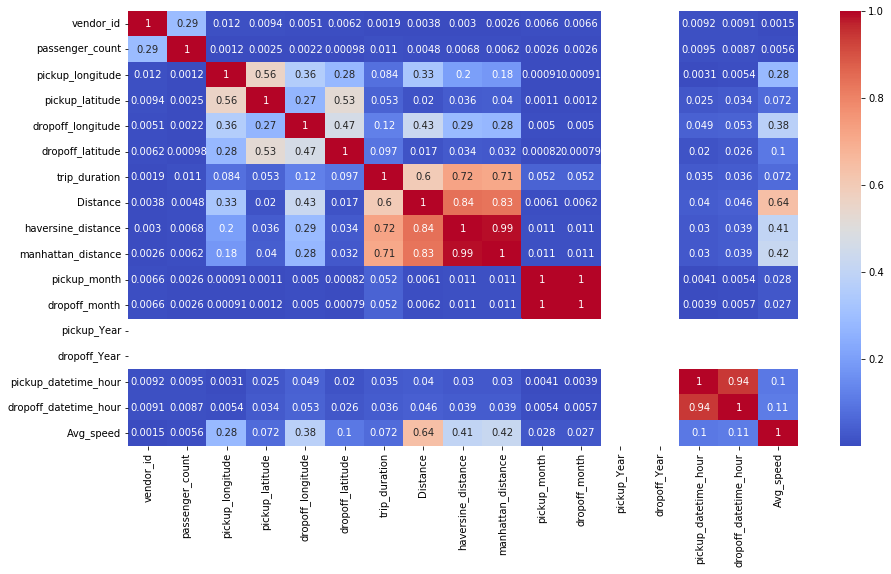

In [172]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [173]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))


In [174]:
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance,haversine_distance,manhattan_distance,pickup_date,dropoff_date,pickup_weekday,dropoff_weekday,pickup_month,dropoff_month,Pick_Up_time,Drop_off_time,pickup_Year,dropoff_Year,pickup_datetime_hour,dropoff_datetime_hour,Avg_speed,pickup_timeofday,dropoff_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455,1.22,0.93,1.08,2016-03-14,2016-03-14,Monday,Monday,3.00,3.00,17:24:55,17:32:30,2016.00,2016.00,17.00,17.00,9.62,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663,1.33,1.12,1.51,2016-06-12,2016-06-12,Sunday,Sunday,6.00,6.00,00:43:35,00:54:38,2016.00,2016.00,0.00,0.00,7.22,Late night,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124,2.10,3.97,5.10,2016-01-19,2016-01-19,Tuesday,Tuesday,1.00,1.00,11:35:24,12:10:48,2016.00,2016.00,11.00,12.00,3.55,Morning,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429,0.30,0.92,1.03,2016-04-06,2016-04-06,Wednesday,Wednesday,4.00,4.00,19:32:31,19:39:40,2016.00,2016.00,19.00,19.00,2.49,Evening,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435,0.20,0.74,0.75,2016-03-26,2016-03-26,Saturday,Saturday,3.00,3.00,13:30:55,13:38:10,2016.00,2016.00,13.00,13.00,1.70,Afternoon,Afternoon


In [175]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Distance','haversine_distance','id','vendor_id','dropoff_month','trip_duration','pickup_datetime','dropoff_datetime','pickup_date','dropoff_date','Pick_Up_time','Drop_off_time'	]]])

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,dropoff_datetime_hour,9.07
1,pickup_datetime_hour,9.04
2,pickup_latitude,1.93
3,dropoff_latitude,1.70
4,pickup_longitude,1.69
5,dropoff_longitude,1.61
6,Avg_speed,1.40
7,manhattan_distance,1.29
8,pickup_month,1.00
9,passenger_count,1.00


In [176]:
df.select_dtypes(include=['object'])

,id,store_and_fwd_flag,pickup_date,dropoff_date,Pick_Up_time,Drop_off_time,pickup_timeofday,dropoff_timeofday
0,id2875421,N,2016-03-14,2016-03-14,17:24:55,17:32:30,Evening,Evening
1,id2377394,N,2016-06-12,2016-06-12,00:43:35,00:54:38,Late night,Late night
2,id3858529,N,2016-01-19,2016-01-19,11:35:24,12:10:48,Morning,Afternoon
3,id3504673,N,2016-04-06,2016-04-06,19:32:31,19:39:40,Evening,Evening
4,id2181028,N,2016-03-26,2016-03-26,13:30:55,13:38:10,Afternoon,Afternoon
...,...,...,...,...,...,...,...,...
1354578,id2376096,N,2016-04-08,2016-04-08,13:31:04,13:44:02,Afternoon,Afternoon
1354579,id1049543,N,2016-01-10,2016-01-10,07:35:15,07:46:10,Morning,Morning
1354580,id2304944,N,2016-04-22,2016-04-22,06:57:41,07:10:25,Morning,Morning
1354581,id2714485,N,2016-01-05,2016-01-05,15:56:26,16:02:39,Afternoon,Evening


In [177]:
df.shape

(1273780, 29)

In [178]:
categorical_col=['pickup_weekday','pickup_timeofday']

In [179]:
df_train=pd.get_dummies(df, columns = categorical_col,drop_first=False)

In [180]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273780 entries, 0 to 1354582
Data columns (total 38 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   id                           1273780 non-null  object        
 1   vendor_id                    1273780 non-null  int64         
 2   pickup_datetime              1273780 non-null  datetime64[ns]
 3   dropoff_datetime             1273780 non-null  datetime64[ns]
 4   passenger_count              1273780 non-null  int64         
 5   pickup_longitude             1273780 non-null  float64       
 6   pickup_latitude              1273780 non-null  float64       
 7   dropoff_longitude            1273780 non-null  float64       
 8   dropoff_latitude             1273780 non-null  float64       
 9   store_and_fwd_flag           1273780 non-null  object        
 10  trip_duration                1273780 non-null  int64         
 11  Distance   

In [181]:
df_train.drop(['id','vendor_id','pickup_datetime','dropoff_datetime','passenger_count',
               'store_and_fwd_flag','Distance','haversine_distance','pickup_date','dropoff_date','dropoff_weekday','pickup_month','dropoff_month','Pick_Up_time','Drop_off_time',
               'pickup_Year','dropoff_Year','dropoff_datetime_hour','Avg_speed','pickup_datetime_hour','dropoff_timeofday'],axis=1,inplace=True)
#'dropoff_longitude','dropoff_latitude',

In [182]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273780 entries, 0 to 1354582
Data columns (total 17 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   pickup_longitude             1273780 non-null  float64
 1   pickup_latitude              1273780 non-null  float64
 2   dropoff_longitude            1273780 non-null  float64
 3   dropoff_latitude             1273780 non-null  float64
 4   trip_duration                1273780 non-null  int64  
 5   manhattan_distance           1273780 non-null  float64
 6   pickup_weekday_Friday        1273780 non-null  uint8  
 7   pickup_weekday_Monday        1273780 non-null  uint8  
 8   pickup_weekday_Saturday      1273780 non-null  uint8  
 9   pickup_weekday_Sunday        1273780 non-null  uint8  
 10  pickup_weekday_Thursday      1273780 non-null  uint8  
 11  pickup_weekday_Tuesday       1273780 non-null  uint8  
 12  pickup_weekday_Wednesday     1273780 non-n

In [183]:
df_train.reset_index(drop=True, inplace=True)
df_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,manhattan_distance,pickup_weekday_Friday,pickup_weekday_Monday,pickup_weekday_Saturday,pickup_weekday_Sunday,pickup_weekday_Thursday,pickup_weekday_Tuesday,pickup_weekday_Wednesday,pickup_timeofday_Afternoon,pickup_timeofday_Evening,pickup_timeofday_Late night,pickup_timeofday_Morning
0,-73.98,40.77,-73.96,40.77,455,1.08,0,1,0,0,0,0,0,0,1,0,0
1,-73.98,40.74,-74.00,40.73,663,1.51,0,0,0,1,0,0,0,0,0,1,0
2,-73.98,40.76,-74.01,40.71,2124,5.10,0,0,0,0,0,1,0,0,0,0,1
3,-74.01,40.72,-74.01,40.71,429,1.03,0,0,0,0,0,0,1,0,1,0,0
4,-73.97,40.79,-73.97,40.78,435,0.75,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273775,-73.98,40.75,-73.99,40.74,778,1.04,1,0,0,0,0,0,0,1,0,0,0
1273776,-74.00,40.75,-73.97,40.80,655,5.01,0,0,0,1,0,0,0,0,0,0,1
1273777,-73.96,40.77,-74.00,40.71,764,6.61,1,0,0,0,0,0,0,0,0,0,1
1273778,-73.98,40.75,-73.97,40.76,373,0.95,0,0,0,0,0,1,0,1,0,0,0


In [184]:
X = df_train.drop('trip_duration',axis=1)
X['manhattan_distance'] = np.log(X['manhattan_distance'])
Y = np.log10(df_train['trip_duration'])


In [185]:
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,manhattan_distance,pickup_weekday_Friday,pickup_weekday_Monday,pickup_weekday_Saturday,pickup_weekday_Sunday,pickup_weekday_Thursday,pickup_weekday_Tuesday,pickup_weekday_Wednesday,pickup_timeofday_Afternoon,pickup_timeofday_Evening,pickup_timeofday_Late night,pickup_timeofday_Morning
0,-73.98,40.77,-73.96,40.77,0.08,0,1,0,0,0,0,0,0,1,0,0
1,-73.98,40.74,-74.00,40.73,0.41,0,0,0,1,0,0,0,0,0,1,0
2,-73.98,40.76,-74.01,40.71,1.63,0,0,0,0,0,1,0,0,0,0,1
3,-74.01,40.72,-74.01,40.71,0.03,0,0,0,0,0,0,1,0,1,0,0
4,-73.97,40.79,-73.97,40.78,-0.29,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273775,-73.98,40.75,-73.99,40.74,0.03,1,0,0,0,0,0,0,1,0,0,0
1273776,-74.00,40.75,-73.97,40.80,1.61,0,0,0,1,0,0,0,0,0,0,1
1273777,-73.96,40.77,-74.00,40.71,1.89,1,0,0,0,0,0,0,0,0,0,1
1273778,-73.98,40.75,-73.97,40.76,-0.06,0,0,0,0,0,1,0,1,0,0,0


In [186]:
Y

0         2.66
1         2.82
2         3.33
3         2.63
4         2.64
          ... 
1273775   2.89
1273776   2.82
1273777   2.88
1273778   2.57
1273779   2.30
Name: trip_duration, Length: 1273780, dtype: float64

In [187]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [188]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model building**
We will start by building simple prediction models and work our way upto more complex models. but first lets start by defining some important function's. 

In [189]:
features = [i for i in df.columns if i not in ['trip_duration']]

Defining for model to fit model 

In [190]:
def fit_mod(model, X_train, X_test, Y_train, Y_test):

  '''Takes regressor model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''
  global Y_pred
  # Fitting the model
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  a,p = Y_test,Y_pred 

  return Y_pred


Defining Evaluation matrix

In [82]:
def eva_mat(model, X_train, X_test, y_train, y_test):

  '''Takes regressor model and compute evaluation matrix '''
  global importance
  global indices
  global feature
# Calculating Evaluation Matrix
  mse = mean_squared_error(Y_test,Y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(Y_test,Y_pred)
  try:
    importance = model.feature_importances_
    feature = features
  except:
    importance = np.abs(model.coef_)
    feature = X
  indices = np.argsort(importance)
  indices = indices[::-1]

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mean_absolute_error(Y_test,Y_pred))
  print("Train R2 :", r2_score(y_train**2,model.predict(X_train)**2))
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))

  

Plotting actual vs pridicted values graph and Feature importance 

In [83]:
def plot_model(model, X_train, X_test, y_train, y_test):

# Plotting actual and predicted values and the feature importances:
  plt.figure(figsize=(18,6))
  plt.subplot(2,1,1)
  plt.plot((Y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted trip duration')
  plt.subplot(2,1,2)
  plt.bar(range(len(indices)),importance[indices])
  plt.xticks(range(len(indices)), [feature[i] for i in indices])
  plt.title('Feature Importance')
  plt.tight_layout()
  plt.show()

  return model

## Linear regression 

In [280]:
lr = LinearRegression()
fit_mod(lr, X_train, X_test, Y_train, Y_test)

array([3.11230469, 2.88775635, 2.97741699, ..., 3.14599609, 2.50323486,
       2.21490479])

In [281]:
eva_mat(lr, X_train, X_test, Y_train, Y_test)

MSE : 0.029536072899025472
RMSE : 0.17186062055929355
MAE : 0.13537633011063457
Train R2 : 0.6073801791469642
Test R2 : 0.6035648967911001
Adjusted R2 :  0.6035399969459593


In [282]:
Y_pred_linear_train = lr.predict(X_train)
Y_pred_linear_test = lr.predict(X_test)

In [283]:
'''Computing MSE ,R2 and Adjusted R2 score for train data''' 
# Mean Square Error 
lr_train_mse  = mean_squared_error(Y_train, Y_pred_linear_train)
print("Train MSE :" , lr_train_mse)

#R2
lr_train_r2 = r2_score(Y_train, Y_pred_linear_train)
print("Train R2 :" ,lr_train_r2)

# Adjusted R2
lr_train_ar2_= 1-(1-r2_score((Y_train), (Y_pred_linear_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_train_ar2_)

Train MSE : 0.02955592374548734
Train R2 : 0.6048503588729488
Train Adjusted R2 :  0.6048441544069756


In [284]:
'''Computing MSE ,R2 and Adjusted R2 score for test data''' 
# Mean Square Error 
lr_test_mse  = mean_squared_error(Y_test, Y_pred_linear_test)
print("Test MSE :" , lr_test_mse)

#R2
lr_test_r2 = r2_score(Y_test, Y_pred_linear_test)
print("Test R2 :" ,lr_test_r2)

# Adjusted R2
lr_test_ar2_= 1-(1-r2_score((Y_test), (Y_pred_linear_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", lr_test_ar2_)

Test MSE : 0.029536072899025472
Test R2 : 0.6035648967911001
Test Adjusted R2 :  0.6035399969459593


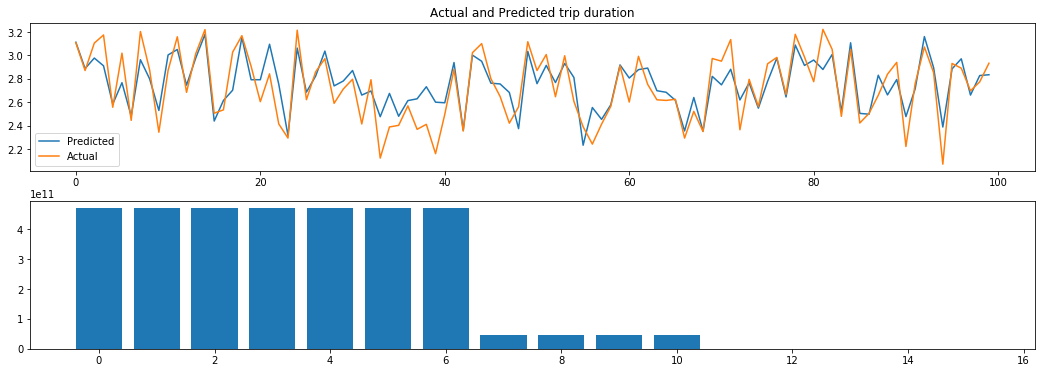

In [285]:
try:
 plot_model(lr, X_train, X_test, Y_train, Y_test)
except Exception:
    pass

## Lasso Regression

In [275]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
#Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)

In [276]:
lasso_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.225e+02, tolerance: 6.092e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.187e+02, tolerance: 6.100e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [286]:
print('The best fit alpha value is found out to be :', lasso_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08}
The R2 score using the same alpha is : 0.6048381825870838


In [287]:
Y_pred_lasso_train = lasso_regressor.predict(X_train)
Y_pred_lasso_test = lasso_regressor.predict(X_test)

In [288]:
'''Computing MSE ,R2 and Adjusted R2 score for train data''' 
# Mean Square Error 
lasso_train_mse  = mean_squared_error(Y_train, Y_pred_lasso_train)
print("Train MSE :" , lasso_train_mse)

#R2
lasso_train_r2 = r2_score(Y_train, Y_pred_lasso_train)
print("Train R2 :" ,lasso_train_r2)

# Adjusted R2
lasso_train_ar2_= 1-(1-r2_score((Y_train), (Y_pred_lasso_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lasso_train_ar2_)

Train MSE : 0.02955586766743796
Train R2 : 0.6048511086116908
Train Adjusted R2 :  0.6048449041574895


In [289]:
'''Computing MSE ,R2 and Adjusted R2 score for test data''' 
# Mean Square Error 
lasso_test_mse  = mean_squared_error(Y_test, Y_pred_lasso_test)
print("Test MSE :" , lasso_test_mse)

#R2
lasso_test_r2 = r2_score(Y_test, Y_pred_lasso_test)
print("Test R2 :" ,lasso_test_r2)

# Adjusted R2
lasso_test_ar2_= 1-(1-r2_score((Y_test), (Y_pred_lasso_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", lasso_test_ar2_)

Test MSE : 0.029535457533236747
Test R2 : 0.6035731562709843
Test Adjusted R2 :  0.6035482569446162


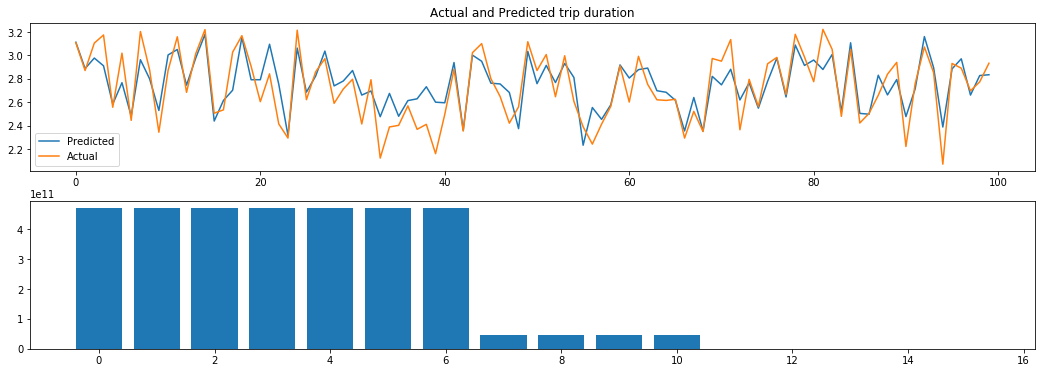

In [290]:
try:
 plot_model(lasso_regressor, X_train, X_test, Y_train, Y_test)
except Exception:
    pass

##Ridge Regression

In [237]:
#parameters 

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

In [240]:
from sklearn.linear_model import Ridge
#Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
rr = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
rr.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.21682e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.21682e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [291]:
Y_pred_ridge_train = rr.predict(X_train)
Y_pred_ridge_test = rr.predict(X_test)

In [292]:
'''Computing MSE ,R2 and Adjusted R2 score for test data''' 
# Mean Square Error 
ridge_train_mse  = mean_squared_error(Y_train, Y_pred_ridge_train)
print("Train MSE :" , ridge_train_mse)

#R2
ridge_train_r2 = r2_score(Y_train, Y_pred_ridge_train)
print("Train R2 :" ,ridge_train_r2)

# Adjusted R2
ridge_train_ar2_= 1-(1-r2_score((Y_train), (Y_pred_ridge_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",ridge_train_ar2_)

Train MSE : 0.029555867699459747
Train R2 : 0.6048511081835737
Train Adjusted R2 :  0.6048449037293657


In [297]:
'''Computing MSE ,R2 and Adjusted R2 score for test data''' 
# Mean Square Error 
ridge_test_mse  = mean_squared_error(Y_test, Y_pred_ridge_test)
print("Test MSE :" , ridge_test_mse)

#R2
ridge_test_r2 = r2_score(Y_test, Y_pred_ridge_test)
print("Test R2 :" ,ridge_test_r2)

# Adjusted R2
ridge_test_ar2_= 1-(1-r2_score((Y_test), (Y_pred_ridge_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", ridge_test_ar2_)

Test MSE : 0.029535451724783
Test R2 : 0.6035732342324305
Test Adjusted R2 :  0.6035483349109592


In [295]:
print('The best fit alpha value is found out to be :' ,rr.best_params_)
print('The R2 score using the same alpha is :', rr.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}
The R2 score using the same alpha is : 0.6048381827951123


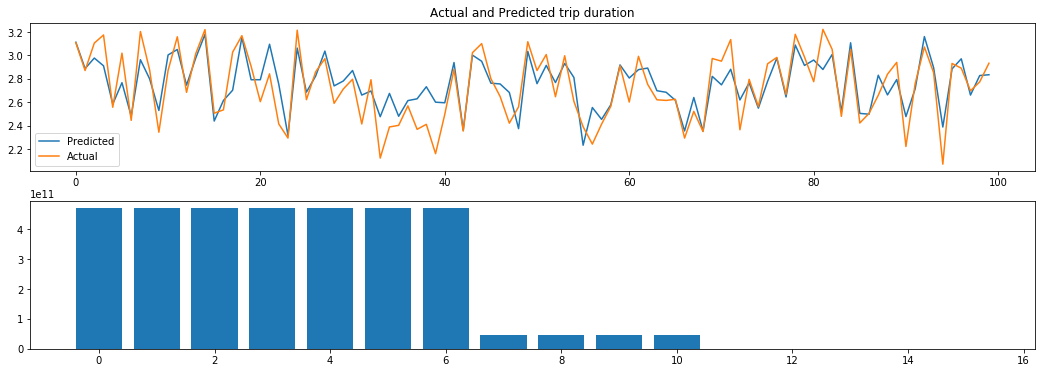

In [298]:
try:
 plot_model(rr, X_train, X_test, Y_train, Y_test)
except Exception:
    pass

## Decision Tree

In [299]:
# Minimum number of samples required to split a node:
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node:
min_samples_leaf = [8,16,22]
# Maximum depth of trees:
max_depth = [6,8,10]

In [97]:
'''
# Regressor

regressor = DecisionTreeRegressor(random_state=1)


# HYperparameter Grid
grid = {'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
dtr = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
dtr.fit(X_train, Y_train)

# Analysing the model with best set of parametes
fit_mod(dtr.best_estimator_, X_train, X_test, Y_train, Y_test)

eva_mat(dtr.best_estimator_ , X_train, X_test, Y_train, Y_test)
'''



MSE : 0.027083009182827494
RMSE : 0.16456916230821464
MAE : 0.12933319645323038
Train R2 : 0.6452565003626518
Test R2 : 0.6364900785115528
Adjusted R2 :  0.6364672466768364


In [98]:
print('The best fit alpha value is found out to be :' ,dtr.best_params_)
print('The R2 score using the same alpha is :', dtr.best_score_)

The best fit alpha value is found out to be : {'max_depth': 10, 'min_samples_leaf': 22, 'min_samples_split': 10}
The R2 score using the same alpha is : -0.027080948630078615


Lets save the parameters to make runs faster. 
'max_depth': 10, 'min_samples_leaf': 22, 'min_samples_split': 10 

In [233]:
# To save time lets input best features 
## 'max_depth': 10, 'min_samples_leaf': 22, 'min_samples_split': 10

dtr = DecisionTreeRegressor(random_state=1, max_depth = 10,min_samples_split=10, min_samples_leaf= 22)

 # Fit the object to train dataset
dtr.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=22, min_samples_split=10,
                      random_state=1)

In [300]:
Y_pred_dtr_train = dtr.predict(X_train)
Y_pred_dtr_test = dtr.predict(X_test)

In [301]:
from sklearn.metrics import r2_score

In [302]:
'''Computing MSE ,R2 and Adjusted R2 score for test data''' 
# Mean Square Error 
dtr_train_mse  = mean_squared_error(Y_train, Y_pred_dtr_train)
print("Train MSE :" , dtr_train_mse)

#R2
dtr_train_r2 = r2_score(Y_train, Y_pred_dtr_train)
print("Train R2 :" ,dtr_train_r2)

# Adjusted R2
dtr_train_ar2_= 1-(1-r2_score((Y_train), (Y_pred_dtr_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",dtr_train_ar2_)

Train MSE : 0.026738994347358824
Train R2 : 0.6425114602594577
Train Adjusted R2 :  0.6425058471315441


In [303]:
'''Computing MSE ,R2 and Adjusted R2 score for test data''' 
# Mean Square Error 
dtr_test_mse  = mean_squared_error(Y_test, Y_pred_dtr_test)
print("Test MSE :" , dtr_test_mse)

#R2
dtr_test_r2 = r2_score(Y_test, Y_pred_dtr_test)
print("Test R2 :" ,dtr_test_r2)

# Adjusted R2
dtr_test_ar2_= 1-(1-r2_score((Y_test), (Y_pred_dtr_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", dtr_test_ar2_)

Test MSE : 0.027083009182827494
Test R2 : 0.6364900785115528
Test Adjusted R2 :  0.6364672466768364


In [304]:
try:
 plot_model(dt.best_estimator_, X_train, X_test, Y_train, Y_test)
except Exception:
    pass

## Random Forest 

In [100]:
# Providing the range of values for hyperparameters such as Number of trees:
n_estimators = [50,100,150]

In [101]:
# Number of trees in random forest
n_estimators = [100,200,500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,10,20]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 5, 10]


If you have access to Powerful machine, please use the commented code below for hyper paramaeter tuning, If time is of the essence continue. 


In [102]:
# Regressor
'''
regressor = RandomForestRegressor(random_state=2)


# HYperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
rf = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
rf.fit(X_train, Y_train)

# Analysing the model with best set of parametes
fit_mod(rf.best_estimator_, X_train, X_test, Y_train, Y_test)

eva_mat(rf.best_estimator_ , X_train, X_test, Y_train, Y_test)

'''



"\nregressor = RandomForestRegressor(random_state=2)\n\n\n# HYperparameter Grid\ngrid = {'n_estimators' : n_estimators,\n        'max_depth' : max_depth,\n        'min_samples_split' : min_samples_split,\n        'min_samples_leaf' : min_samples_leaf}\n\n# GridSearch to find the best parameters\nrf = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)\nrf.fit(X_train, Y_train)\n\n# Analysing the model with best set of parametes\nfit_mod(rf.best_estimator_, X_train, X_test, Y_train, Y_test)\n\neva_mat(rf.best_estimator_ , X_train, X_test, Y_train, Y_test)\n\n"

In [103]:
# To save time lets input best features 
#random_state=2,n_estimators = 100, max_depth = 10,min_samples_split=5, n_jobs = -1

rf = RandomForestRegressor(n_estimators = 100, max_depth = 10,min_samples_split=5, n_jobs = -1)

 # Fit the object to train dataset
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_jobs=-1)

In [305]:
Y_pred_forest_train = rf.predict(X_train)
Y_pred_forest_test = rf.predict(X_test)

In [306]:
'''Computing MSE ,R2 and Adjusted R2 score for train data''' 
# Mean Square Error 
forest_train_mse  = mean_squared_error(Y_train, Y_pred_forest_train)
print("Train MSE :" , forest_train_mse)

# R2 
forest_train_r2 = r2_score(Y_train, Y_pred_forest_train)
print("Train R2 :" ,forest_train_r2)

# Adjusted R2
forest_train_ar2_= 1-(1-r2_score((Y_train), (Y_pred_forest_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",forest_train_ar2_)


Train MSE : 0.025834741757618247
Train R2 : 0.6546009178382874
Train Adjusted R2 :  0.6545954945337227


In [307]:
'''Computing MSE ,R2 and Adjusted R2 score for test data''' 
# Mean Square Error 
forest_test_mse  = mean_squared_error(Y_test, Y_pred_forest_test)
print("Test MSE :" , forest_test_mse)

# R2 
forest_test_r2 = r2_score(Y_test, Y_pred_forest_test)
print("Test R2 :" ,forest_test_r2)

# Adjusted R2
forest_test_ar2_= 1-(1-r2_score((Y_test), (Y_pred_forest_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", forest_test_ar2_)

Test MSE : 0.02616378091321389
Test R2 : 0.6488280204980392
Test Adjusted R2 :  0.6488059636018748


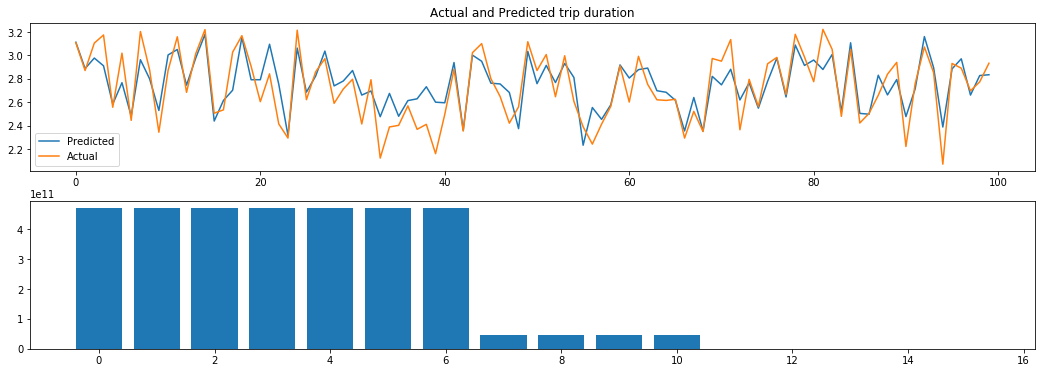

In [308]:
try:
 plot_model(rf, X_train, X_test, Y_train, Y_test)
except Exception:
    pass

## XG boost

In [192]:
from xgboost import XGBRegressor as xgb
import xgboost as xgb 
from sklearn.model_selection import GridSearchCV

In [193]:
# Learning rate:
eta = [0.05,0.08,0.1]

# HYperparameter Grid
grid = {'learning_rate': [0.1, 0.2, 0.3],
        'max_depth': [5, 8, 10],
        'min_samples_' : [2,4,6],
        'n_estimators' : [100,200,300]}

In [110]:
# Regressor
'''
regressor = XGBRegressor(silent=True,random_state=0, objective='reg:squarederror')



# GridSearch to find the best parameters
xgb = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
xgb.fit(X_train, Y_train)

# Analysing the model with best set of parametes
fit_mod(xgb.best_estimator_, X_train, X_test, Y_train, Y_test)

eva_mat(xgb.best_estimator_ , X_train, X_test, Y_train, Y_test)
'''

"\nregressor = XGBRegressor(silent=True,random_state=0, objective='reg:squarederror')\n\n\n\n# GridSearch to find the best parameters\nxgb = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)\nxgb.fit(X_train, Y_train)\n\n# Analysing the model with best set of parametes\nfit_mod(xgb.best_estimator_, X_train, X_test, Y_train, Y_test)\n\neva_mat(xgb.best_estimator_ , X_train, X_test, Y_train, Y_test)\n"

In [198]:
regressor = xgb.XGBRegressor()
grid_values = {'n_estimators' : [200], 'max_depth': [8],'min_samples_' : [4],'learning_rate' : [0.2]}
xgb_model = GridSearchCV(estimator = regressor, param_grid = grid_values, scoring = 'r2', cv=3,verbose=1,)

In [199]:
 # Fit the object to train dataset
xgb_model.fit(X_train, Y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[15:09:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.2], 'max_depth': [8],
                         'min_samples_': [4], 'n_estimators': [200]},
             scoring='r2', verbose=1)

In [309]:
Y_pred_xgb_train = xgb_model.predict(X_train)
Y_pred_xgb_test = xgb_model.predict(X_test)

In [310]:
'''Computing MSE ,R2 and Adjusted R2 score for train data''' 

# Mean Square Error
xgb_train_mse  = mean_squared_error(Y_train, Y_pred_xgb_train)
print("Train MSE :" , xgb_train_mse)
# R2 
xgb_train_r2 = r2_score(Y_train, Y_pred_xgb_train)
print("Train R2 :" ,xgb_train_r2)
# Adjusted R2 
xgb_train_ar2_= 1-(1-r2_score((Y_train), (Y_pred_xgb_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",xgb_train_ar2_)

Train MSE : 0.017527017545205345
Train R2 : 0.7656715197719758
Train Adjusted R2 :  0.7656678404491805


In [311]:
'''Computing MSE ,R2 and Adjusted R2 score for test data''' 

# Mean Square Error
xgb_test_mse  = mean_squared_error(Y_test, Y_pred_xgb_test)
print("Test MSE :" , xgb_test_mse)
# R2 
xgb_test_r2 = r2_score(Y_test, Y_pred_xgb_test)
print("Test R2 :" ,xgb_test_r2)
# Adjusted R2 
xgb_test_ar2_= 1-(1-r2_score((Y_test), (Y_pred_xgb_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", xgb_test_ar2_)

Test MSE : 0.019073938508944524
Test R2 : 0.7439883491876429
Test Adjusted R2 :  0.7439722692532277


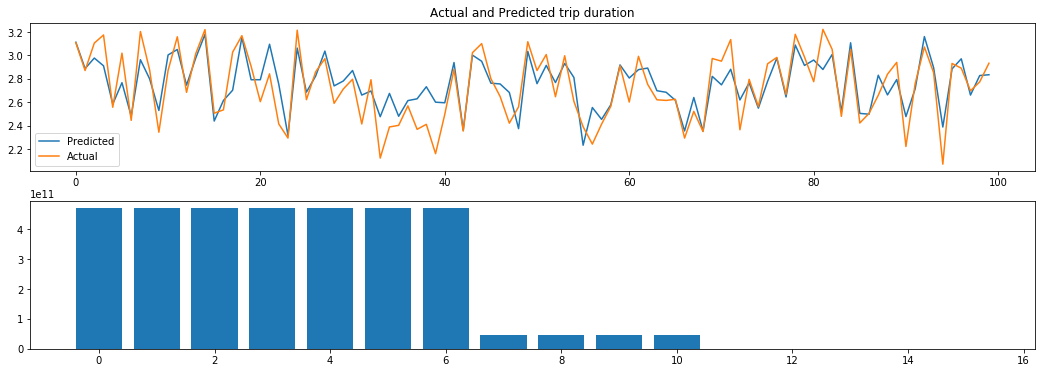

In [312]:
try:
 plot_model(xgb_model, X_train, X_test, Y_train, Y_test)
except Exception:
    pass

## GradientBoost 

In [204]:
from sklearn.ensemble import GradientBoostingRegressor

In [207]:
gbr_model.estimator.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__base_score', 'estimator__booster', 'estimator__colsample_bylevel', 'estimator__colsample_bynode', 'estimator__colsample_bytree', 'estimator__gamma', 'estimator__importance_type', 'estimator__learning_rate', 'estimator__max_delta_step', 'estimator__max_depth', 'estimator__min_child_weight', 'estimator__missing', 'estimator__n_estimators', 'estimator__n_jobs', 'estimator__nthread', 'estimator__objective', 'estimator__random_state', 'estimator__reg_alpha', 'estimator__reg_lambda', 'estimator__scale_pos_weight', 'estimator__seed', 'estimator__silent', 'estimator__subsample', 'estimator__verbosity', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [ ]:
# Regressor
'''
regressor = GradientBoostingRegressor(random_state=4)

# HYperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
gbr = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
gbr.fit(X_train, Y_train)

# Analysing the model with best set of parametes
fit_mod(gbr.best_estimator_, X_train, X_test, Y_train, Y_test)

eva_mat(gbr.best_estimator_ , X_train, X_test, Y_train, Y_test)
'''

In [210]:
# To make the process faster 
gbr=GradientBoostingRegressor( loss = 'huber',learning_rate=0.07,n_estimators=350, max_depth=6,subsample=1,verbose=False)

In [211]:
 # Fit the object to train dataset
 
gbr.fit(X_train,Y_train)

GradientBoostingRegressor(learning_rate=0.07, loss='huber', max_depth=6,
                          n_estimators=350, subsample=1, verbose=False)

In [313]:
# Computing y pred 
Y_pred_gbr_train = gbr.predict(X_train)
Y_pred_gbr_test = gbr.predict(X_test)

In [314]:
'''Computing MSE ,R2 and Adjusted R2 score for train data''' 

# Mean Squared Error 
gbr_train_mse  = mean_squared_error(Y_train, Y_pred_gbr_train)
print("Train MSE :" , gbr_train_mse)

# R2
gbr_train_r2 = r2_score(Y_train, Y_pred_gbr_train)
print("Train R2 :" ,gbr_train_r2)

#Adjusted R2
gbr_train_ar2_= 1-(1-r2_score((Y_train), (Y_pred_gbr_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",gbr_train_ar2_)

Train MSE : 0.020589304477962533
Train R2 : 0.7247300965592496
Train Adjusted R2 :  0.7247257743922232


In [315]:
'''Computing MSE ,R2 and Adjusted R2 score for test data''' 

# Mean Squared Error 
gbr_test_mse  = mean_squared_error(Y_test, Y_pred_gbr_test)
print("Test MSE :" , gbr_test_mse)

# R2
gbr_test_r2 = r2_score(Y_test, Y_pred_gbr_test)
print("Test R2 :" ,gbr_test_r2)

#Adjusted R2
gbr_test_ar2_= 1-(1-r2_score((Y_test), (Y_pred_gbr_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", gbr_test_ar2_)

Test MSE : 0.021064878889272252
Test R2 : 0.7172658171213021
Test Adjusted R2 :  0.7172480587610743


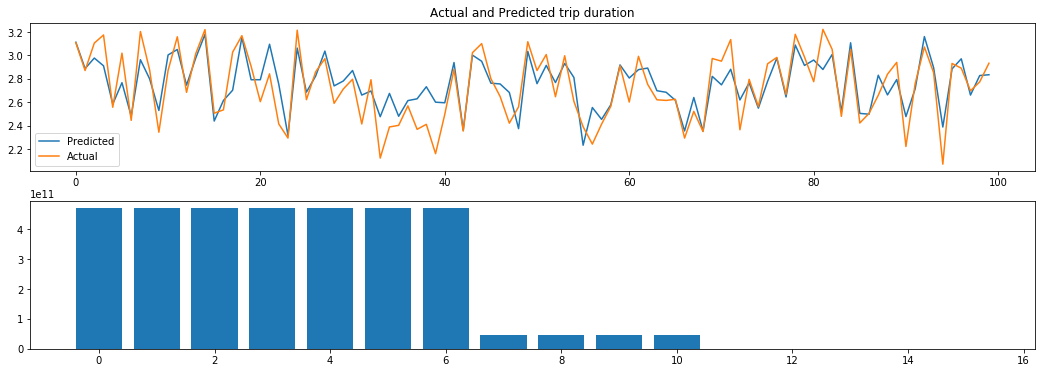

In [316]:
try:
 plot_model(gbr, X_train, X_test, Y_train, Y_test)
except Exception:
    pass

# Model Evalutaion 


In [324]:
import warnings; warnings.simplefilter('ignore')

In [325]:
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor','Ramdom Forest','XGBoost Regressor','GradientBoost']

#TEST 

test_mse= [lr_test_mse,lasso_test_mse,dtr_test_mse,forest_test_mse,gbr_test_mse,xgb_test_mse,ridge_test_mse]
test_r2=[lr_test_r2,lasso_test_r2,dtr_test_r2,forest_test_r2,gbr_test_r2,xgb_test_r2,ridge_test_r2]
test_adjr2=[lr_test_ar2_,lasso_test_ar2_,dtr_test_ar2_,forest_test_ar2_,gbr_test_ar2_,xgb_test_ar2_,ridge_test_ar2_]

#TRAIN
train_mse=[lr_train_mse,lasso_train_mse,dtr_train_mse,forest_train_mse,gbr_train_mse,xgb_train_mse,ridge_train_mse]
train_r2=[lr_train_r2,lasso_train_r2,dtr_train_r2,forest_train_r2,gbr_train_r2,xgb_train_r2,ridge_train_r2]
train_adjr2=[lr_train_ar2_,lasso_train_ar2_,dtr_train_ar2_,forest_train_ar2_,gbr_train_ar2_,xgb_train_ar2_,ridge_train_ar2_]

In [337]:

with pd.option_context('display.precision', 10):
 model_comparison = pd.DataFrame({'Model Name': models,
                          'Train_MSE': train_mse,'Test_MSE': test_mse,
                          'Train_R^2': train_r2, 'Test_R^2': test_r2,
                          'Train_Adjusted_R^2': train_adjr2, 'Test_Adjusted_R^2': test_adjr2})
model_comparison

,Model Name,Train_MSE,Test_MSE,Train_R^2,Test_R^2,Train_Adjusted_R^2,Test_Adjusted_R^2
0,Linear Regression,0.03,0.03,0.60,0.60,0.60,0.60
1,Lasso Regression,0.03,0.03,0.60,0.60,0.60,0.60
2,Ridge Regression,0.03,0.03,0.64,0.64,0.64,0.64
3,DecisionTree Regressor,0.03,0.03,0.65,0.65,0.65,0.65
4,Ramdom Forest,0.02,0.02,0.72,0.72,0.72,0.72
5,XGBoost Regressor,0.02,0.02,0.77,0.74,0.77,0.74
6,GradientBoost,0.03,0.03,0.60,0.60,0.60,0.60


In [338]:
model_comparison.Train_MSE

0   0.03
1   0.03
2   0.03
3   0.03
4   0.02
5   0.02
6   0.03
Name: Train_MSE, dtype: float64

# **NOTE** :(limitation)

As ensemble models are greedy in nature and Due to the limitations of computing power, i have estimated the best parameters for our data set. But if one is looking to improve the model performace. You can easily do so by running grid search CV which will improve the model performance dramtically. 